In [1]:
import mysql.connector

In [8]:
# Conectando ao banco criado
my_db = mysql.connector.connect(
  host="localhost",
  user="root",
  password="123456",
  database="bancoresumao"
)

querys = my_db.cursor()

# Exibe nomes das Colunas

In [9]:
querys.execute("SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'resumo'")
querys.fetchall()

[('id',), ('nome',), ('idade',), ('sexo',), ('aniversario',)]

# Mudando tipo de dado SQL
<p> SELECT CAST(col AS type) </p>

# Visualizando Tabelas e Colunas

In [4]:
querys.execute('SHOW TABLES')
querys.fetchall()

[('outra_tabela',), ('resumo',), ('sexo_idade',)]

In [5]:
querys.execute('SHOW columns from resumo')
querys.fetchall()

[('id', b'int', 'NO', 'PRI', None, 'auto_increment'),
 ('nome', b'varchar(40)', 'YES', '', None, ''),
 ('idade', b'int', 'YES', '', None, ''),
 ('sexo', b'char(1)', 'YES', '', None, ''),
 ('aniversario', b'date', 'YES', '', None, '')]

# Selecionando Todos Os Dados

In [29]:
querys.execute('SELECT * FROM resumo')
querys.fetchall()

[(1, 'Andre', 20, 'M', datetime.date(2002, 12, 20)),
 (2, 'Joao', 30, 'M', datetime.date(1992, 2, 2)),
 (3, 'Carlos', 22, 'M', datetime.date(2000, 3, 24)),
 (4, 'Miguel', 19, 'M', datetime.date(2003, 5, 10)),
 (5, 'Camila', 40, 'M', datetime.date(1982, 12, 25)),
 (6, 'Maria', 24, 'F', datetime.date(1998, 11, 5)),
 (7, 'Janete', 22, 'F', datetime.date(2000, 4, 5))]

# Seleção Booleana Com Data
<p> SELECT + WHERE + 'data' </p>

In [30]:
querys.execute("SELECT * FROM resumo WHERE resumo.aniversario > '2000,1,1'")
querys.fetchall()

[(1, 'Andre', 20, 'M', datetime.date(2002, 12, 20)),
 (3, 'Carlos', 22, 'M', datetime.date(2000, 3, 24)),
 (4, 'Miguel', 19, 'M', datetime.date(2003, 5, 10)),
 (7, 'Janete', 22, 'F', datetime.date(2000, 4, 5))]

## Duplo boleano
<p> SELECT + WHERE + AND </p>

In [33]:
querys.execute("SELECT * FROM resumo WHERE resumo.idade > 20 and resumo.sexo = 'M'")
querys.fetchall()

[(2, 'Joao', 30, 'M', datetime.date(1992, 2, 2)),
 (3, 'Carlos', 22, 'M', datetime.date(2000, 3, 24)),
 (5, 'Camila', 40, 'M', datetime.date(1982, 12, 25))]

## Booleano Triplo

In [28]:
# APENAS JOÃO
querys.execute("SELECT * FROM resumo WHERE (resumo.idade > 20 and resumo.sexo = 'M') and resumo.idade = 30")
querys.fetchall()

[(2, 'Joao', 30, 'M', datetime.date(1992, 2, 2))]

## Not Booleano 

In [29]:
# TODOS OS DADOS MENOS JOÃO
querys.execute("SELECT * FROM resumo WHERE (resumo.idade > 20 and resumo.sexo = 'M') and NOT resumo.idade = 30")
querys.fetchall()

[(3, 'Carlos', 22, 'M', datetime.date(2000, 3, 24)),
 (5, 'Camila', 40, 'M', datetime.date(1982, 12, 25))]

# Selecionando Apenas Uma Coluna

In [34]:
querys.execute("SELECT nome FROM resumo WHERE resumo.idade > 20 and resumo.sexo = 'M'")
querys.fetchall()

[('Joao',), ('Carlos',), ('Camila',)]

# Selecionando E Organizando
SELECT + ORDER BY

In [38]:
# ORDENANDO POR IDADE
querys.execute("SELECT * FROM resumo ORDER BY idade")
querys.fetchall()

[(4, 'Miguel', 19, 'M', datetime.date(2003, 5, 10)),
 (1, 'Andre', 20, 'M', datetime.date(2002, 12, 20)),
 (3, 'Carlos', 22, 'M', datetime.date(2000, 3, 24)),
 (7, 'Janete', 22, 'F', datetime.date(2000, 4, 5)),
 (6, 'Maria', 24, 'F', datetime.date(1998, 11, 5)),
 (2, 'Joao', 30, 'M', datetime.date(1992, 2, 2)),
 (5, 'Camila', 40, 'M', datetime.date(1982, 12, 25))]

In [63]:
# ORDENANDO POR IDADE
querys.execute("SELECT * FROM resumo ORDER BY 4")
querys.fetchall()

[(6, 'Maria', 24, 'F', datetime.date(1998, 11, 5)),
 (7, 'Janete', 22, 'F', datetime.date(2000, 4, 5)),
 (1, 'Andre', 20, 'M', datetime.date(2002, 12, 20)),
 (2, 'Joao', 30, 'M', datetime.date(1992, 2, 2)),
 (3, 'Carlos', 22, 'M', datetime.date(2000, 3, 24)),
 (4, 'Miguel', 19, 'M', datetime.date(2003, 5, 10)),
 (5, 'Camila', 40, 'M', datetime.date(1982, 12, 25))]

# Selecionando Valores Distintos
SELECT + DISTINCT 

In [36]:
# SELECIONANDO UNIQUE VALUES SEXO
querys.execute("SELECT DISTINCT sexo FROM resumo")
querys.fetchall()

[('M',), ('F',)]

# Selecionando Apenas Idades Pares
<p> SELECT + WHERE + % </p>

In [37]:
querys.execute("SELECT * FROM resumo WHERE resumo.idade % 2 = 0")
querys.fetchall()

[(1, 'Andre', 20, 'M', datetime.date(2002, 12, 20)),
 (2, 'Joao', 30, 'M', datetime.date(1992, 2, 2)),
 (3, 'Carlos', 22, 'M', datetime.date(2000, 3, 24)),
 (5, 'Camila', 40, 'M', datetime.date(1982, 12, 25)),
 (6, 'Maria', 24, 'F', datetime.date(1998, 11, 5)),
 (7, 'Janete', 22, 'F', datetime.date(2000, 4, 5))]

# Criandos Novas Colunas Com Operações Em Outras
<p>Criando uma coluna que mostra "de menor" para todos dados da coluna resumo onde a idade é menor que 21</p>

In [20]:
querys.execute("SELECT id, UPPER('de menor') maior_idade FROM resumo WHERE idade < 21")
querys.fetchall()

[(1, 'DE MENOR'), (4, 'DE MENOR')]

# Juntando textos com concat E aninhando FROMS
<p> FAZENDO UM FROM ANINHADO OS DADOS DO PRIMEIRO SELECT SÃO SALVOS NA TABELA de_menores E USADOS PELA SEGUNDA TABELA. </p>

In [21]:
querys.execute("SELECT CONCAT(de_menores.nome, ' tem ', de_menores.idade, ' anos') 'De Menores' FROM (SELECT nome,idade FROM resumo WHERE idade <22) de_menores")
querys.fetchall()

[('Andre tem 20 anos',), ('Miguel tem 19 anos',)]

# Usando LIKE para manipular Strings

In [22]:
querys.execute("SELECT * FROM RESUMO WHERE nome LIKE 'M%'")
querys.fetchall()

[(4, 'Miguel', 19, 'M', datetime.date(2003, 5, 10)),
 (6, 'Maria', 24, 'F', datetime.date(1998, 11, 5))]

# Criando Uma View

In [28]:
querys.execute("CREATE VIEW sexo_idade AS SELECT idade, sexo FROM resumo WHERE sexo = 'F'")
querys.execute("SELECT * FROM sexo_idade")
querys.fetchall()

[(24, 'F'), (22, 'F')]

# Inner Join
<p> ACRESCENTANDO apelido + fazendo INNER JOIN </p>

In [48]:
querys.execute('SELECT * FROM resumo')
querys.fetchall()

[(1, 'Andre', 20, 'M', datetime.date(2002, 12, 20)),
 (2, 'Joao', 30, 'M', datetime.date(1992, 2, 2)),
 (3, 'Carlos', 22, 'M', datetime.date(2000, 3, 24)),
 (4, 'Miguel', 19, 'M', datetime.date(2003, 5, 10)),
 (5, 'Camila', 40, 'M', datetime.date(1982, 12, 25)),
 (6, 'Maria', 24, 'F', datetime.date(1998, 11, 5)),
 (7, 'Janete', 22, 'F', datetime.date(2000, 4, 5))]

In [9]:
querys.execute('SELECT * FROM outra_tabela')
querys.fetchall()

[(1, 1.8), (2, 1.9), (3, 1.86), (4, 1.75), (5, 1.54), (6, 1.66), (7, 1.5)]

In [18]:
new_q = ("SELECT r.id,r.sexo,o.altura FROM resumo r INNER JOIN outra_tabela o ON r.id = o.id")

In [19]:
querys.execute(new_q)
querys.fetchall()

[(1, 'M', 1.8),
 (2, 'M', 1.9),
 (3, 'M', 1.86),
 (4, 'M', 1.75),
 (5, 'M', 1.54),
 (6, 'F', 1.66),
 (7, 'F', 1.5)]

# GROUP BY
<p> USAMOS O HAVING PARA EFETUAR UMA SELEÇÃO DEPOIS DO AGRUPAMENTO </p>
<p> USAMOS O WHERE PARA EFETUAR UMA SELEÇÃO ANTES DO AGRUPAMENTO </p>

In [6]:
querys.execute('SELECT * FROM resumo')
querys.fetchall()

[(1, 'Andre', 20, 'M', datetime.date(2002, 12, 20)),
 (2, 'Joao', 30, 'M', datetime.date(1992, 2, 2)),
 (3, 'Carlos', 22, 'M', datetime.date(2000, 3, 24)),
 (4, 'Miguel', 19, 'M', datetime.date(2003, 5, 10)),
 (5, 'Camila', 40, 'M', datetime.date(1982, 12, 25)),
 (6, 'Maria', 24, 'F', datetime.date(1998, 11, 5)),
 (7, 'Janete', 22, 'F', datetime.date(2000, 4, 5))]

In [12]:
querys.execute('SELECT sexo,sum(idade) FROM resumo GROUP BY resumo.sexo')
querys.fetchall()

[('M', Decimal('131')), ('F', Decimal('46'))]

In [17]:
querys.execute('SELECT sexo,sum(idade) FROM resumo GROUP BY resumo.sexo HAVING sum(idade) > 20')
querys.fetchall()

[('M', Decimal('131')), ('F', Decimal('46'))]

In [26]:
querys.execute('SELECT sexo, sum(idade) FROM resumo WHERE idade > 22 GROUP BY resumo.sexo')
querys.fetchall()

[('M', Decimal('70')), ('F', Decimal('24'))]

# BETWEEN

In [4]:
querys.execute('SELECT * FROM resumo WHERE idade BETWEEN 22 AND 30')
querys.fetchall()

[(2, 'Joao', 30, 'M', datetime.date(1992, 2, 2)),
 (3, 'Carlos', 22, 'M', datetime.date(2000, 3, 24)),
 (6, 'Maria', 24, 'F', datetime.date(1998, 11, 5)),
 (7, 'Janete', 22, 'F', datetime.date(2000, 4, 5))]

In [11]:
querys.execute("SELECT * FROM resumo WHERE nome BETWEEN 'A' AND 'D'")
querys.fetchall()

[(1, 'Andre', 20, 'M', datetime.date(2002, 12, 20)),
 (3, 'Carlos', 22, 'M', datetime.date(2000, 3, 24)),
 (5, 'Camila', 40, 'M', datetime.date(1982, 12, 25))]

# MANIPULAÇÃO DE STRING

## OPERADOR LIKE

In [21]:
# SELECIONANDO PESSOAS COM a na segunda letra

In [22]:
querys.execute("SELECT nome FROM resumo WHERE nome like '_a%'")
querys.fetchall()

[('Carlos',), ('Camila',), ('Maria',), ('Janete',)]

In [23]:
querys.execute("SELECT nome FROM resumo WHERE nome like '%a%'")
querys.fetchall()

[('Andre',), ('Joao',), ('Carlos',), ('Camila',), ('Maria',), ('Janete',)]

## Like Com Count

In [28]:
querys.execute("SELECT nome, nome LIKE 'M%' valores FROM resumo ")
querys.fetchall()

[('Andre', 0),
 ('Joao', 0),
 ('Carlos', 0),
 ('Miguel', 1),
 ('Camila', 0),
 ('Maria', 1),
 ('Janete', 0)]

# OPERADOR IN COM LIKE

In [ ]:
querys.execute("SELECT nome,idade FROM resumo WHERE nome IN (SELECT nome FROM resumo WHERE nome like 'C%')")
querys.fetchall()

In [20]:
# SELECIONANDO DADOS QUE COMEÇAM COM C

In [10]:
querys.execute("SELECT nome,idade FROM resumo WHERE nome IN (SELECT nome FROM resumo WHERE nome like 'C%')")
querys.fetchall()

[('Carlos', 22), ('Camila', 40)]

## NOT IN

In [19]:
# SELECIONANDO OS DADOS QUE NÃO COMEÇAM COM C

In [11]:
querys.execute("SELECT nome,idade FROM resumo WHERE nome NOT IN (SELECT nome FROM resumo WHERE nome like 'C%')")
querys.fetchall()

[('Andre', 20), ('Joao', 30), ('Miguel', 19), ('Maria', 24), ('Janete', 22)]

## LEFT

In [18]:
# SELECIONANDO APENAS O MIGUEL

In [17]:
querys.execute("SELECT nome FROM resumo WHERE LEFT(nome,2) = 'Mi'")
querys.fetchall()

[('Miguel',)]

# NULL
<p> Retornando nulos </p>

In [24]:
querys.execute("SELECT * FROM resumo WHERE idade = NULL")
querys.fetchall()

[]

In [25]:
querys.execute("SELECT * FROM resumo WHERE idade IS NULL")
querys.fetchall()

[]

# DIFERENTE !=                <> 
<p> Valores diferentes de uma determinada variavel </p>

In [30]:
querys.execute('SELECT * FROM resumo WHERE idade <> 40')
querys.fetchall()

[(1, 'Andre', 20, 'M', datetime.date(2002, 12, 20)),
 (2, 'Joao', 30, 'M', datetime.date(1992, 2, 2)),
 (3, 'Carlos', 22, 'M', datetime.date(2000, 3, 24)),
 (4, 'Miguel', 19, 'M', datetime.date(2003, 5, 10)),
 (6, 'Maria', 24, 'F', datetime.date(1998, 11, 5)),
 (7, 'Janete', 22, 'F', datetime.date(2000, 4, 5))]

# UNION
<p> União de Datasets </p>

In [39]:
querys.execute('SELECT * FROM resumo WHERE idade >22 UNION SELECT * FROM resumo WHERE idade <22')
querys.fetchall()

[(2, 'Joao', 30, 'M', datetime.date(1992, 2, 2)),
 (5, 'Camila', 40, 'M', datetime.date(1982, 12, 25)),
 (6, 'Maria', 24, 'F', datetime.date(1998, 11, 5)),
 (1, 'Andre', 20, 'M', datetime.date(2002, 12, 20)),
 (4, 'Miguel', 19, 'M', datetime.date(2003, 5, 10))]

# CONCAT
<p> Junção de palavras </p>
<p> PARA SQL SERVER JUNTAMOS PALAVRAS COM || </p>

In [9]:
querys.execute("SELECT CONCAT(nome,'@outlook.com') FROM resumo ")
querys.fetchall()

[('Andre@outlook.com',),
 ('Joao@outlook.com',),
 ('Carlos@outlook.com',),
 ('Miguel@outlook.com',),
 ('Camila@outlook.com',),
 ('Maria@outlook.com',),
 ('Janete@outlook.com',)]

# Length

<p> Tamanho das palavras </p>

In [10]:
querys.execute("SELECT LENGTH(nome) FROM resumo ")
querys.fetchall()

[(5,), (4,), (6,), (6,), (6,), (5,), (6,)]

# Posições Indices
<p> Seleção de indices com position e locate </p>

In [15]:
querys.execute("SELECT POSITION('ue' IN nome) FROM resumo ")
querys.fetchall()

[(0,), (0,), (0,), (4,), (0,), (0,), (0,)]

In [23]:
querys.execute("SELECT LOCATE('ue', nome, 4) FROM resumo ")
querys.fetchall()

[(0,), (0,), (0,), (4,), (0,), (0,), (0,)]

# Replace
<p> Altera um determinado dado </p>
<p> para o SQL SERVER usaremos o STUFF </p>

In [29]:
querys.execute("SELECT * FROM resumo ")
querys.fetchall()

[(1, 'Andre', 20, 'M', datetime.date(2002, 12, 20)),
 (2, 'Joao', 30, 'M', datetime.date(1992, 2, 2)),
 (3, 'Carlos', 22, 'M', datetime.date(2000, 3, 24)),
 (4, 'Miguel', 19, 'M', datetime.date(2003, 5, 10)),
 (5, 'Camila', 40, 'M', datetime.date(1982, 12, 25)),
 (6, 'Maria', 24, 'F', datetime.date(1998, 11, 5)),
 (7, 'Janete', 22, 'F', datetime.date(2000, 4, 5))]

In [32]:
querys.execute("SELECT REPLACE('M','M','0') FROM resumo")
querys.fetchall()

[('0',), ('0',), ('0',), ('0',), ('0',), ('0',), ('0',)]

# Calculos
<p> Formulas matemáticas </p>

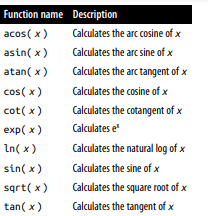
<p><b> MOD, AVERAGE, SUM, MIN, POW, CEIL, FLOOR, ROUND, TRUNCATE, SIGN, ABS</b></p>

# DATA TYPE
<p> Extraindo datas </p>

In [53]:
querys.execute("SELECT MONTH(aniversario), YEAR(aniversario), current_date(),current_time() FROM resumo")
querys.fetchall()

[(12, 2002, datetime.date(2022, 3, 3), datetime.timedelta(seconds=72892)),
 (2, 1992, datetime.date(2022, 3, 3), datetime.timedelta(seconds=72892)),
 (3, 2000, datetime.date(2022, 3, 3), datetime.timedelta(seconds=72892)),
 (5, 2003, datetime.date(2022, 3, 3), datetime.timedelta(seconds=72892)),
 (12, 1982, datetime.date(2022, 3, 3), datetime.timedelta(seconds=72892)),
 (11, 1998, datetime.date(2022, 3, 3), datetime.timedelta(seconds=72892)),
 (4, 2000, datetime.date(2022, 3, 3), datetime.timedelta(seconds=72892))]

# CASE WHEN

In [10]:
querys.execute("\
    SELECT nome,idade, CASE \
    WHEN resumo.idade > 22 THEN 'VELHO' \
    WHEN resumo.idade = 22 THEN 'MEDIA IDADE' \
    ELSE 'JOVEM' END 'faixa' FROM resumo")
querys.fetchall()

[('Andre', 20, 'JOVEM'),
 ('Joao', 30, 'VELHO'),
 ('Carlos', 22, 'MEDIA IDADE'),
 ('Miguel', 19, 'JOVEM'),
 ('Camila', 40, 'VELHO'),
 ('Maria', 24, 'VELHO'),
 ('Janete', 22, 'MEDIA IDADE')]